In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../..'))
sys.path.insert(0, os.path.abspath('../../src'))

## Demo I: Univariate time series segmentation

In [2]:
from pytseg.plot import plot

### Create test data

In [ ]:
from pytseg.data import test_fun
from pytseg.seg import normalize

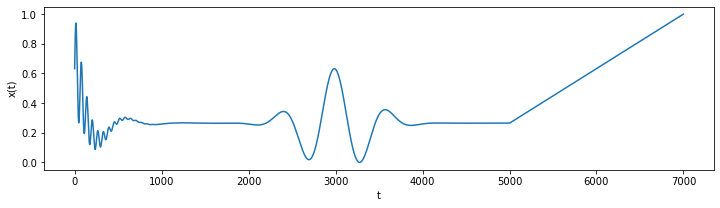

In [3]:
x, t = test_fun()
x, t = normalize(x, t)
plot(x, t=t, figure_kwarg_dict=dict(figsize=(12,3)))

### Segmentation

In [4]:
from pytseg.seg import cut

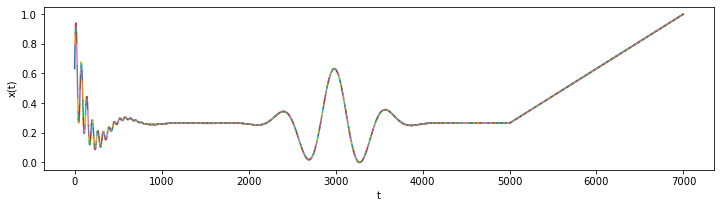

In [5]:
s = cut(x, .95, 3)
plot(x, s=s, figure_kwarg_dict=dict(figsize=(12,3)))

### Stationarity

In [6]:
from pytseg.seg import segment_stationarity

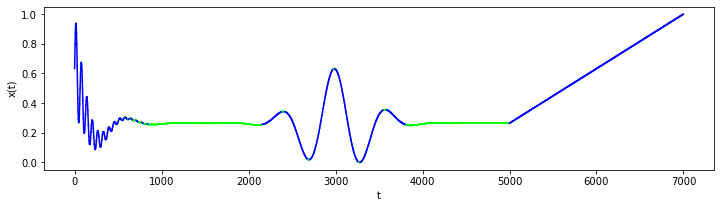

In [7]:
l = segment_stationarity(x, s, threshold=.001)
plot(x, s=s, l=l, figure_kwarg_dict=dict(figsize=(12,3)))

### Clustering

In [8]:
from pytseg.seg import segment_clustering

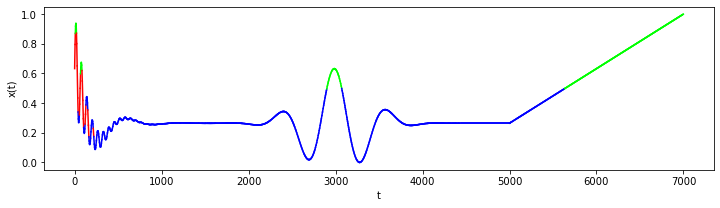

In [9]:
l = segment_clustering(x, s, n_clusters=3, random_state=0, feature_maps=[np.mean, np.std])
plot(x, s=s, l=l, figure_kwarg_dict=dict(figsize=(12,3)))

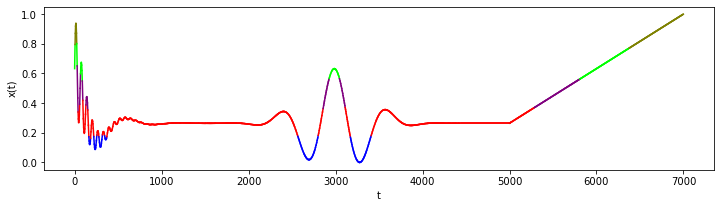

In [10]:
l = segment_clustering(x, s, n_clusters=5, random_state=0, feature_maps=[np.mean])
plot(x, s=s, l=l, figure_kwarg_dict=dict(figsize=(12,3)))

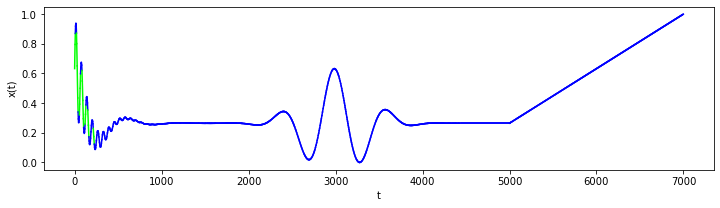

In [11]:
def fm(x):
    return np.abs(np.max(x)-np.min(x))
l = segment_clustering(x, s, n_clusters=2, random_state=0, feature_maps=[fm])
plot(x, s=s, l=l, figure_kwarg_dict=dict(figsize=(12,3)))